# Import Pertinent Libraries/Load Dataset

#### Importing Libraries

In [1]:
import sqlite3
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols

####  Loading Dataset/Tables

In [2]:
conn = sqlite3.connect('Northwind_small.sqlite')
cur = conn.cursor()

In [3]:
cur.execute("""SELECT name FROM sqlite_master WHERE type='table';""").fetchall()

[('Employee',),
 ('Category',),
 ('Customer',),
 ('Shipper',),
 ('Supplier',),
 ('Order',),
 ('Product',),
 ('OrderDetail',),
 ('CustomerCustomerDemo',),
 ('CustomerDemographic',),
 ('Region',),
 ('Territory',),
 ('EmployeeTerritory',)]

In [4]:
cur.execute('''SELECT * FROM Product''')
product_data = pd.DataFrame(cur.fetchall())
product_data.columns = [x[0] for x in cur.description]
display(len(product_data))
product_data.head()

77

,Id,ProductName,SupplierId,CategoryId,QuantityPerUnit,UnitPrice,UnitsInStock,UnitsOnOrder,ReorderLevel,Discontinued
0,1,Chai,1,1,10 boxes x 20 bags,18.00,39,0,10,0
1,2,Chang,1,1,24 - 12 oz bottles,19.00,17,40,25,0
2,3,Aniseed Syrup,1,2,12 - 550 ml bottles,10.00,13,70,25,0
3,4,Chef Anton's Cajun Seasoning,2,2,48 - 6 oz jars,22.00,53,0,0,0
4,5,Chef Anton's Gumbo Mix,2,2,36 boxes,21.35,0,0,0,1


In [5]:
#Column ID should be named ProductId for easier calling of data

In [6]:
cur.execute('''SELECT * FROM Supplier''')
supplier_data = pd.DataFrame(cur.fetchall())
supplier_data.columns = [x[0] for x in cur.description]
display(len(supplier_data))
supplier_data.head()

29

,Id,CompanyName,ContactName,ContactTitle,Address,City,Region,PostalCode,Country,Phone,Fax,HomePage
0,1,Exotic Liquids,Charlotte Cooper,Purchasing Manager,49 Gilbert St.,London,British Isles,EC1 4SD,UK,(171) 555-2222,None,None
1,2,New Orleans Cajun Delights,Shelley Burke,Order Administrator,P.O. Box 78934,New Orleans,North America,70117,USA,(100) 555-4822,None,#CAJUN.HTM#
2,3,Grandma Kelly's Homestead,Regina Murphy,Sales Representative,707 Oxford Rd.,Ann Arbor,North America,48104,USA,(313) 555-5735,(313) 555-3349,None
3,4,Tokyo Traders,Yoshi Nagase,Marketing Manager,9-8 Sekimai Musashino-shi,Tokyo,Eastern Asia,100,Japan,(03) 3555-5011,None,None
4,5,Cooperativa de Quesos 'Las Cabras',Antonio del Valle Saavedra,Export Administrator,Calle del Rosal 4,Oviedo,Southern Europe,33007,Spain,(98) 598 76 54,None,None


In [7]:
cur.execute('''SELECT * FROM Region''')
region_data = pd.DataFrame(cur.fetchall())
region_data.columns = [x[0] for x in cur.description]
display(len(region_data))
region_data.head()

4

,Id,RegionDescription
0,1,Eastern
1,2,Western
2,3,Northern
3,4,Southern


In [8]:
cur.execute('''SELECT * FROM [Order]''')
order_data = pd.DataFrame(cur.fetchall())
order_data.columns = [x[0] for x in cur.description]
display(len(order_data))
order_data.head()

830

,Id,CustomerId,EmployeeId,OrderDate,RequiredDate,ShippedDate,ShipVia,Freight,ShipName,ShipAddress,ShipCity,ShipRegion,ShipPostalCode,ShipCountry
0,10248,VINET,5,2012-07-04,2012-08-01,2012-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,Western Europe,51100,France
1,10249,TOMSP,6,2012-07-05,2012-08-16,2012-07-10,1,11.61,Toms Spezialitäten,Luisenstr. 48,Münster,Western Europe,44087,Germany
2,10250,HANAR,4,2012-07-08,2012-08-05,2012-07-12,2,65.83,Hanari Carnes,"Rua do Paço, 67",Rio de Janeiro,South America,05454-876,Brazil
3,10251,VICTE,3,2012-07-08,2012-08-05,2012-07-15,1,41.34,Victuailles en stock,"2, rue du Commerce",Lyon,Western Europe,69004,France
4,10252,SUPRD,4,2012-07-09,2012-08-06,2012-07-11,2,51.30,Suprêmes délices,"Boulevard Tirou, 255",Charleroi,Western Europe,B-6000,Belgium


In [9]:
cur.execute('''SELECT * FROM OrderDetail''')
order_detail_data = pd.DataFrame(cur.fetchall())
order_detail_data.columns = [x[0] for x in cur.description]
display(len(order_detail_data))
order_detail_data.head()

2155

,Id,OrderId,ProductId,UnitPrice,Quantity,Discount
0,10248/11,10248,11,14.0,12,0.0
1,10248/42,10248,42,9.8,10,0.0
2,10248/72,10248,72,34.8,5,0.0
3,10249/14,10249,14,18.6,9,0.0
4,10249/51,10249,51,42.4,40,0.0


In [10]:
cur.execute('''SELECT * FROM Category''')
category_data = pd.DataFrame(cur.fetchall())
category_data.columns = [x[0] for x in cur.description]
display(len(category_data))
category_data.head()

8

,Id,CategoryName,Description
0,1,Beverages,"Soft drinks, coffees, teas, beers, and ales"
1,2,Condiments,"Sweet and savory sauces, relishes, spreads, an..."
2,3,Confections,"Desserts, candies, and sweet breads"
3,4,Dairy Products,Cheeses
4,5,Grains/Cereals,"Breads, crackers, pasta, and cereal"


In [11]:
cur.execute('''SELECT * FROM Employee''')
employee_data = pd.DataFrame(cur.fetchall())
employee_data.columns = [x[0] for x in cur.description]
display(len(employee_data))
employee_data.head()

9

,Id,LastName,FirstName,Title,TitleOfCourtesy,BirthDate,HireDate,Address,City,Region,PostalCode,Country,HomePhone,Extension,Photo,Notes,ReportsTo,PhotoPath
0,1,Davolio,Nancy,Sales Representative,Ms.,1980-12-08,2024-05-01,507 - 20th Ave. E. Apt. 2A,Seattle,North America,98122,USA,(206) 555-9857,5467,None,Education includes a BA in psychology from Col...,2.0,http://accweb/emmployees/davolio.bmp
1,2,Fuller,Andrew,"Vice President, Sales",Dr.,1984-02-19,2024-08-14,908 W. Capital Way,Tacoma,North America,98401,USA,(206) 555-9482,3457,None,Andrew received his BTS commercial in 1974 and...,NaN,http://accweb/emmployees/fuller.bmp
2,3,Leverling,Janet,Sales Representative,Ms.,1995-08-30,2024-04-01,722 Moss Bay Blvd.,Kirkland,North America,98033,USA,(206) 555-3412,3355,None,Janet has a BS degree in chemistry from Boston...,2.0,http://accweb/emmployees/leverling.bmp
3,4,Peacock,Margaret,Sales Representative,Mrs.,1969-09-19,2025-05-03,4110 Old Redmond Rd.,Redmond,North America,98052,USA,(206) 555-8122,5176,None,Margaret holds a BA in English literature from...,2.0,http://accweb/emmployees/peacock.bmp
4,5,Buchanan,Steven,Sales Manager,Mr.,1987-03-04,2025-10-17,14 Garrett Hill,London,British Isles,SW1 8JR,UK,(71) 555-4848,3453,None,Steven Buchanan graduated from St. Andrews Uni...,2.0,http://accweb/emmployees/buchanan.bmp


In [12]:
cur.execute('''SELECT * FROM EmployeeTerritory''')
employee_territory_data = pd.DataFrame(cur.fetchall())
employee_territory_data.columns = [x[0] for x in cur.description]
display(len(employee_territory_data))
employee_territory_data.head()

49

,Id,EmployeeId,TerritoryId
0,1/06897,1,06897
1,1/19713,1,19713
2,2/01581,2,01581
3,2/01730,2,01730
4,2/01833,2,01833


In [13]:
cur.execute('''SELECT * FROM Territory''')
territory_data = pd.DataFrame(cur.fetchall())
territory_data.columns = [x[0] for x in cur.description]
display(len(territory_data))
territory_data.head()

53

,Id,TerritoryDescription,RegionId
0,01581,Westboro,1
1,01730,Bedford,1
2,01833,Georgetow,1
3,02116,Boston,1
4,02139,Cambridge,1


In [14]:
cur.execute('''SELECT * FROM Customer''')
customer_data = pd.DataFrame(cur.fetchall())
customer_data.columns = [x[0] for x in cur.description]
display(len(customer_data))
customer_data.head()

91

,Id,CompanyName,ContactName,ContactTitle,Address,City,Region,PostalCode,Country,Phone,Fax
0,ALFKI,Alfreds Futterkiste,Maria Anders,Sales Representative,Obere Str. 57,Berlin,Western Europe,12209,Germany,030-0074321,030-0076545
1,ANATR,Ana Trujillo Emparedados y helados,Ana Trujillo,Owner,Avda. de la Constitución 2222,México D.F.,Central America,05021,Mexico,(5) 555-4729,(5) 555-3745
2,ANTON,Antonio Moreno Taquería,Antonio Moreno,Owner,Mataderos 2312,México D.F.,Central America,05023,Mexico,(5) 555-3932,None
3,AROUT,Around the Horn,Thomas Hardy,Sales Representative,120 Hanover Sq.,London,British Isles,WA1 1DP,UK,(171) 555-7788,(171) 555-6750
4,BERGS,Berglunds snabbköp,Christina Berglund,Order Administrator,Berguvsvägen 8,Luleå,Northern Europe,S-958 22,Sweden,0921-12 34 65,0921-12 34 67


In [15]:
cur.execute('''SELECT * FROM Shipper''')
shipper_data = pd.DataFrame(cur.fetchall())
shipper_data.columns = [x[0] for x in cur.description]
display(len(shipper_data))
shipper_data.head()

3

,Id,CompanyName,Phone
0,1,Speedy Express,(503) 555-9831
1,2,United Package,(503) 555-3199
2,3,Federal Shipping,(503) 555-9931


The below tables contain no data. Will be omitted during Data inspection, cleaning, and, EDA. BBRING TO SHAREHOLDERS' ATTENTION

In [16]:
cur.execute('''SELECT * FROM CustomerCustomerDemo''')
customer_customer_demo_data = pd.DataFrame(cur.fetchall())
display(len(customer_customer_demo_data))
customer_customer_demo_data.head()

0

""


In [17]:
cur.execute('''SELECT * FROM CustomerDemographic''')
customer_demographic_data = pd.DataFrame(cur.fetchall())
display(len(customer_demographic_data))
customer_demographic_data.head()

0

""


# Data Inspection and Cleaning

#### Checking data type/missing data points/duplicates

In [18]:
#needed a function to streamline inspection
def data_inspector(df):
    duplicates = df[df.duplicated()]
    display('----Missing Values----',df.isna().sum())
    display('----Duplicate Values----')
    display(str(len(duplicates))  + ' duplicates')
    for col in df.columns:
        print(col, '\n', df[col].value_counts(normalize=True), '\n\n')

In [ ]:
frames = [product_data, supplier_data, order_data]

In [19]:
product_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 10 columns):
Id                 77 non-null int64
ProductName        77 non-null object
SupplierId         77 non-null int64
CategoryId         77 non-null int64
QuantityPerUnit    77 non-null object
UnitPrice          77 non-null float64
UnitsInStock       77 non-null int64
UnitsOnOrder       77 non-null int64
ReorderLevel       77 non-null int64
Discontinued       77 non-null int64
dtypes: float64(1), int64(7), object(2)
memory usage: 6.1+ KB


In [20]:
data_inspector(product_data)

'----Missing Values----'

Id                 0
ProductName        0
SupplierId         0
CategoryId         0
QuantityPerUnit    0
UnitPrice          0
UnitsInStock       0
UnitsOnOrder       0
ReorderLevel       0
Discontinued       0
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 77    0.012987
28    0.012987
21    0.012987
22    0.012987
23    0.012987
24    0.012987
25    0.012987
26    0.012987
27    0.012987
29    0.012987
38    0.012987
30    0.012987
31    0.012987
32    0.012987
33    0.012987
34    0.012987
35    0.012987
36    0.012987
20    0.012987
19    0.012987
18    0.012987
17    0.012987
2     0.012987
3     0.012987
4     0.012987
5     0.012987
6     0.012987
7     0.012987
8     0.012987
9     0.012987
        ...   
66    0.012987
68    0.012987
40    0.012987
69    0.012987
70    0.012987
71    0.012987
72    0.012987
73    0.012987
74    0.012987
75    0.012987
59    0.012987
58    0.012987
57    0.012987
56    0.012987
41    0.012987
42    0.012987
43    0.012987
44    0.012987
45    0.012987
46    0.012987
47    0.012987
48    0.012987
49    0.012987
50    0.012987
51    0.012987
52    0.012987
53    0.012987
54    0.012987
55    0.012987
1     0.012987
Name: Id, Length: 77, dtype: float64 


ProductName 
 Gnocchi di nonna Alice    

In [21]:
data_inspector(supplier_data)

'----Missing Values----'

Id               0
CompanyName      0
ContactName      0
ContactTitle     0
Address          0
City             0
Region           0
PostalCode       0
Country          0
Phone            0
Fax             16
HomePage        24
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 29    0.034483
14    0.034483
2     0.034483
3     0.034483
4     0.034483
5     0.034483
6     0.034483
7     0.034483
8     0.034483
9     0.034483
10    0.034483
11    0.034483
12    0.034483
13    0.034483
15    0.034483
28    0.034483
16    0.034483
17    0.034483
18    0.034483
19    0.034483
20    0.034483
21    0.034483
22    0.034483
23    0.034483
24    0.034483
25    0.034483
26    0.034483
27    0.034483
1     0.034483
Name: Id, dtype: float64 


CompanyName 
 Grandma Kelly's Homestead                 0.034483
Exotic Liquids                            0.034483
Forêts d'érables                          0.034483
Nord-Ost-Fisch Handelsgesellschaft mbH    0.034483
Leka Trading                              0.034483
Bigfoot Breweries                         0.034483
Plutzer Lebensmittelgroßmärkte AG         0.034483
Mayumi's                                  0.034483
Karkki Oy                                 0.034483
Cooperativa de Quesos 'Las Cabras'        0.034483
New Orle

The supplier table is missing fax numbers and home pages. More than likely will not impact EDA but should be brought to the attention of stakeholders.

In [22]:
data_inspector(order_data)

'----Missing Values----'

Id                 0
CustomerId         0
EmployeeId         0
OrderDate          0
RequiredDate       0
ShippedDate       21
ShipVia            0
Freight            0
ShipName           0
ShipAddress        0
ShipCity           0
ShipRegion         0
ShipPostalCode    19
ShipCountry        0
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 11077    0.001205
10520    0.001205
10530    0.001205
10529    0.001205
10528    0.001205
10527    0.001205
10526    0.001205
10525    0.001205
10524    0.001205
10523    0.001205
10522    0.001205
10521    0.001205
10519    0.001205
10532    0.001205
10518    0.001205
10517    0.001205
10516    0.001205
10515    0.001205
10514    0.001205
10513    0.001205
10512    0.001205
10511    0.001205
10510    0.001205
10509    0.001205
10531    0.001205
10533    0.001205
10507    0.001205
10546    0.001205
10556    0.001205
10555    0.001205
           ...   
10772    0.001205
10771    0.001205
10770    0.001205
10769    0.001205
10791    0.001205
10792    0.001205
10793    0.001205
10794    0.001205
10815    0.001205
10814    0.001205
10813    0.001205
10812    0.001205
10811    0.001205
10810    0.001205
10809    0.001205
10808    0.001205
10807    0.001205
10806    0.001205
10805    0.001205
10804    0.001205
10803    0.001205
10802    0.001205
10801    0.001205
10800    0.001205
10799

ShippedDate and ShipPostalCode are missing values. This information can be crutial during EDA. BRING TO THE ATTENTION OF SHAREHOLDERS.

In [23]:
data_inspector(order_detail_data)

'----Missing Values----'

Id           0
OrderId      0
ProductId    0
UnitPrice    0
Quantity     0
Discount     0
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 10703/2     0.000464
11077/13    0.000464
10904/58    0.000464
10459/72    0.000464
10760/43    0.000464
10558/47    0.000464
10419/60    0.000464
10918/60    0.000464
10572/75    0.000464
10885/24    0.000464
10532/30    0.000464
10612/60    0.000464
10486/74    0.000464
10606/4     0.000464
10673/16    0.000464
10914/71    0.000464
10663/42    0.000464
10728/30    0.000464
10578/57    0.000464
10965/51    0.000464
11075/46    0.000464
10862/11    0.000464
11024/71    0.000464
10596/75    0.000464
10504/2     0.000464
10444/26    0.000464
10387/71    0.000464
10455/53    0.000464
10864/67    0.000464
10977/63    0.000464
              ...   
11077/10    0.000464
10733/52    0.000464
10849/26    0.000464
10604/48    0.000464
10370/64    0.000464
10950/4     0.000464
10665/59    0.000464
11014/41    0.000464
10835/77    0.000464
10733/28    0.000464
10901/41    0.000464
10345/42    0.000464
10556/72    0.000464
10795/17    0.000464
10992/72    0.000464
10482/40    0.000464
11077/66

In [24]:
data_inspector(category_data)

'----Missing Values----'

Id              0
CategoryName    0
Description     0
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 8    0.125
7    0.125
6    0.125
5    0.125
4    0.125
3    0.125
2    0.125
1    0.125
Name: Id, dtype: float64 


CategoryName 
 Dairy Products    0.125
Seafood           0.125
Meat/Poultry      0.125
Produce           0.125
Beverages         0.125
Condiments        0.125
Confections       0.125
Grains/Cereals    0.125
Name: CategoryName, dtype: float64 


Description 
 Soft drinks, coffees, teas, beers, and ales                   0.125
Desserts, candies, and sweet breads                           0.125
Prepared meats                                                0.125
Dried fruit and bean curd                                     0.125
Breads, crackers, pasta, and cereal                           0.125
Sweet and savory sauces, relishes, spreads, and seasonings    0.125
Cheeses                                                       0.125
Seaweed and fish                                              0.125
Name: Description, dtype: float64 




In [25]:
data_inspector(employee_data)

'----Missing Values----'

Id                 0
LastName           0
FirstName          0
Title              0
TitleOfCourtesy    0
BirthDate          0
HireDate           0
Address            0
City               0
Region             0
PostalCode         0
Country            0
HomePhone          0
Extension          0
Photo              9
Notes              0
ReportsTo          1
PhotoPath          0
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 9    0.111111
8    0.111111
7    0.111111
6    0.111111
5    0.111111
4    0.111111
3    0.111111
2    0.111111
1    0.111111
Name: Id, dtype: float64 


LastName 
 Dodsworth    0.111111
Buchanan     0.111111
Suyama       0.111111
Fuller       0.111111
King         0.111111
Callahan     0.111111
Leverling    0.111111
Davolio      0.111111
Peacock      0.111111
Name: LastName, dtype: float64 


FirstName 
 Margaret    0.111111
Steven      0.111111
Andrew      0.111111
Janet       0.111111
Robert      0.111111
Anne        0.111111
Nancy       0.111111
Laura       0.111111
Michael     0.111111
Name: FirstName, dtype: float64 


Title 
 Sales Representative        0.666667
Sales Manager               0.111111
Vice President, Sales       0.111111
Inside Sales Coordinator    0.111111
Name: Title, dtype: float64 


TitleOfCourtesy 
 Ms.     0.444444
Mr.     0.333333
Mrs.    0.111111
Dr.     0.111111
Name: TitleOfCourtesy, dtype: float64 


BirthDate 
 1984-02-19    0.111111
1987-03-04   

Photos being missing is no biggie. Missing ReportTo is the highest ranking company employee. Of no consequence.

In [26]:
data_inspector(employee_territory_data)

'----Missing Values----'

Id             0
EmployeeId     0
TerritoryId    0
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 1/19713    0.020408
9/55113    0.020408
4/20852    0.020408
9/48084    0.020408
3/33607    0.020408
5/07960    0.020408
7/94105    0.020408
2/01730    0.020408
9/55439    0.020408
6/85251    0.020408
4/27403    0.020408
5/10019    0.020408
1/06897    0.020408
5/14450    0.020408
2/02184    0.020408
9/03049    0.020408
6/98004    0.020408
7/95054    0.020408
7/94025    0.020408
2/01581    0.020408
8/45839    0.020408
5/11747    0.020408
6/98052    0.020408
6/98104    0.020408
5/02903    0.020408
9/48304    0.020408
7/95008    0.020408
2/02139    0.020408
3/31406    0.020408
8/53404    0.020408
3/32859    0.020408
7/60179    0.020408
8/19428    0.020408
2/40222    0.020408
7/90405    0.020408
7/60601    0.020408
3/30346    0.020408
2/02116    0.020408
8/44122    0.020408
5/08837    0.020408
2/01833    0.020408
9/48075    0.020408
7/80202    0.020408
6/85014    0.020408
7/80909    0.020408
4/27511    0.020408
7/95060    0.020408
5/10038    0.020408
9/03801    0.020408
Name: Id, dtype

In [27]:
data_inspector(territory_data)

'----Missing Values----'

Id                      0
TerritoryDescription    0
RegionId                0
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 95054    0.018868
11747    0.018868
60179    0.018868
10038    0.018868
98052    0.018868
02903    0.018868
45839    0.018868
95008    0.018868
48084    0.018868
27511    0.018868
75234    0.018868
33607    0.018868
06897    0.018868
90405    0.018868
40222    0.018868
30346    0.018868
98004    0.018868
55439    0.018868
98104    0.018868
02184    0.018868
14450    0.018868
78759    0.018868
80909    0.018868
01730    0.018868
29202    0.018868
19428    0.018868
03049    0.018868
85014    0.018868
02116    0.018868
48304    0.018868
53404    0.018868
08837    0.018868
55113    0.018868
10019    0.018868
95060    0.018868
94025    0.018868
27403    0.018868
94105    0.018868
19713    0.018868
60601    0.018868
85251    0.018868
02139    0.018868
31406    0.018868
80202    0.018868
01833    0.018868
44122    0.018868
20852    0.018868
72716    0.018868
48075    0.018868
01581    0.018868
03801    0.018868
07960    0.018868
32859    0.018868
Name: Id, dtype: float64 


TerritoryDesc

In [28]:
data_inspector(customer_data)

'----Missing Values----'

Id               0
CompanyName      0
ContactName      0
ContactTitle     0
Address          0
City             0
Region           0
PostalCode       1
Country          0
Phone            0
Fax             22
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 PARIS    0.010989
MORGK    0.010989
ROMEY    0.010989
HUNGO    0.010989
TORTU    0.010989
PERIC    0.010989
LAZYK    0.010989
VAFFE    0.010989
SUPRD    0.010989
RICSU    0.010989
FOLIG    0.010989
REGGC    0.010989
FAMIA    0.010989
TRADH    0.010989
OTTIK    0.010989
ERNSH    0.010989
ISLAT    0.010989
EASTC    0.010989
LEHMS    0.010989
FURIB    0.010989
WHITC    0.010989
CACTU    0.010989
ANTON    0.010989
GREAL    0.010989
GOURL    0.010989
MAGAA    0.010989
GALED    0.010989
BLONP    0.010989
CHOPS    0.010989
MEREP    0.010989
           ...   
HILAA    0.010989
SIMOB    0.010989
LAUGB    0.010989
KOENE    0.010989
SPECD    0.010989
LONEP    0.010989
THECR    0.010989
NORTS    0.010989
VICTE    0.010989
HANAR    0.010989
SAVEA    0.010989
WILMK    0.010989
SEVES    0.010989
QUEEN    0.010989
BONAP    0.010989
BOTTM    0.010989
FOLKO    0.010989
WELLI    0.010989
CENTC    0.010989
VINET    0.010989
DRACD    0.010989
TRAIH    0.010989
THEBI    0.010989
SANTG    0.010989
FISSA

The missing value in PostalCode could be pertinent if we examine data focusing on that. Make note.

In [29]:
data_inspector(shipper_data)

'----Missing Values----'

Id             0
CompanyName    0
Phone          0
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 3    0.333333
2    0.333333
1    0.333333
Name: Id, dtype: float64 


CompanyName 
 Federal Shipping    0.333333
United Package      0.333333
Speedy Express      0.333333
Name: CompanyName, dtype: float64 


Phone 
 (503) 555-3199    0.333333
(503) 555-9931    0.333333
(503) 555-9831    0.333333
Name: Phone, dtype: float64 




In [30]:
data_inspector(region_data)

'----Missing Values----'

Id                   0
RegionDescription    0
dtype: int64

'----Duplicate Values----'

'0 duplicates'

Id 
 4    0.25
3    0.25
2    0.25
1    0.25
Name: Id, dtype: float64 


RegionDescription 
 Northern    0.25
Southern    0.25
Western     0.25
Eastern     0.25
Name: RegionDescription, dtype: float64 




Final thoughts: 
Data was fairly clean with no extraneous or duplicated values spotted. 
Focus will need to be placed on explaining the shortfalls of the data collection process to shareholders for acquisition of cleaner data.

# EDA

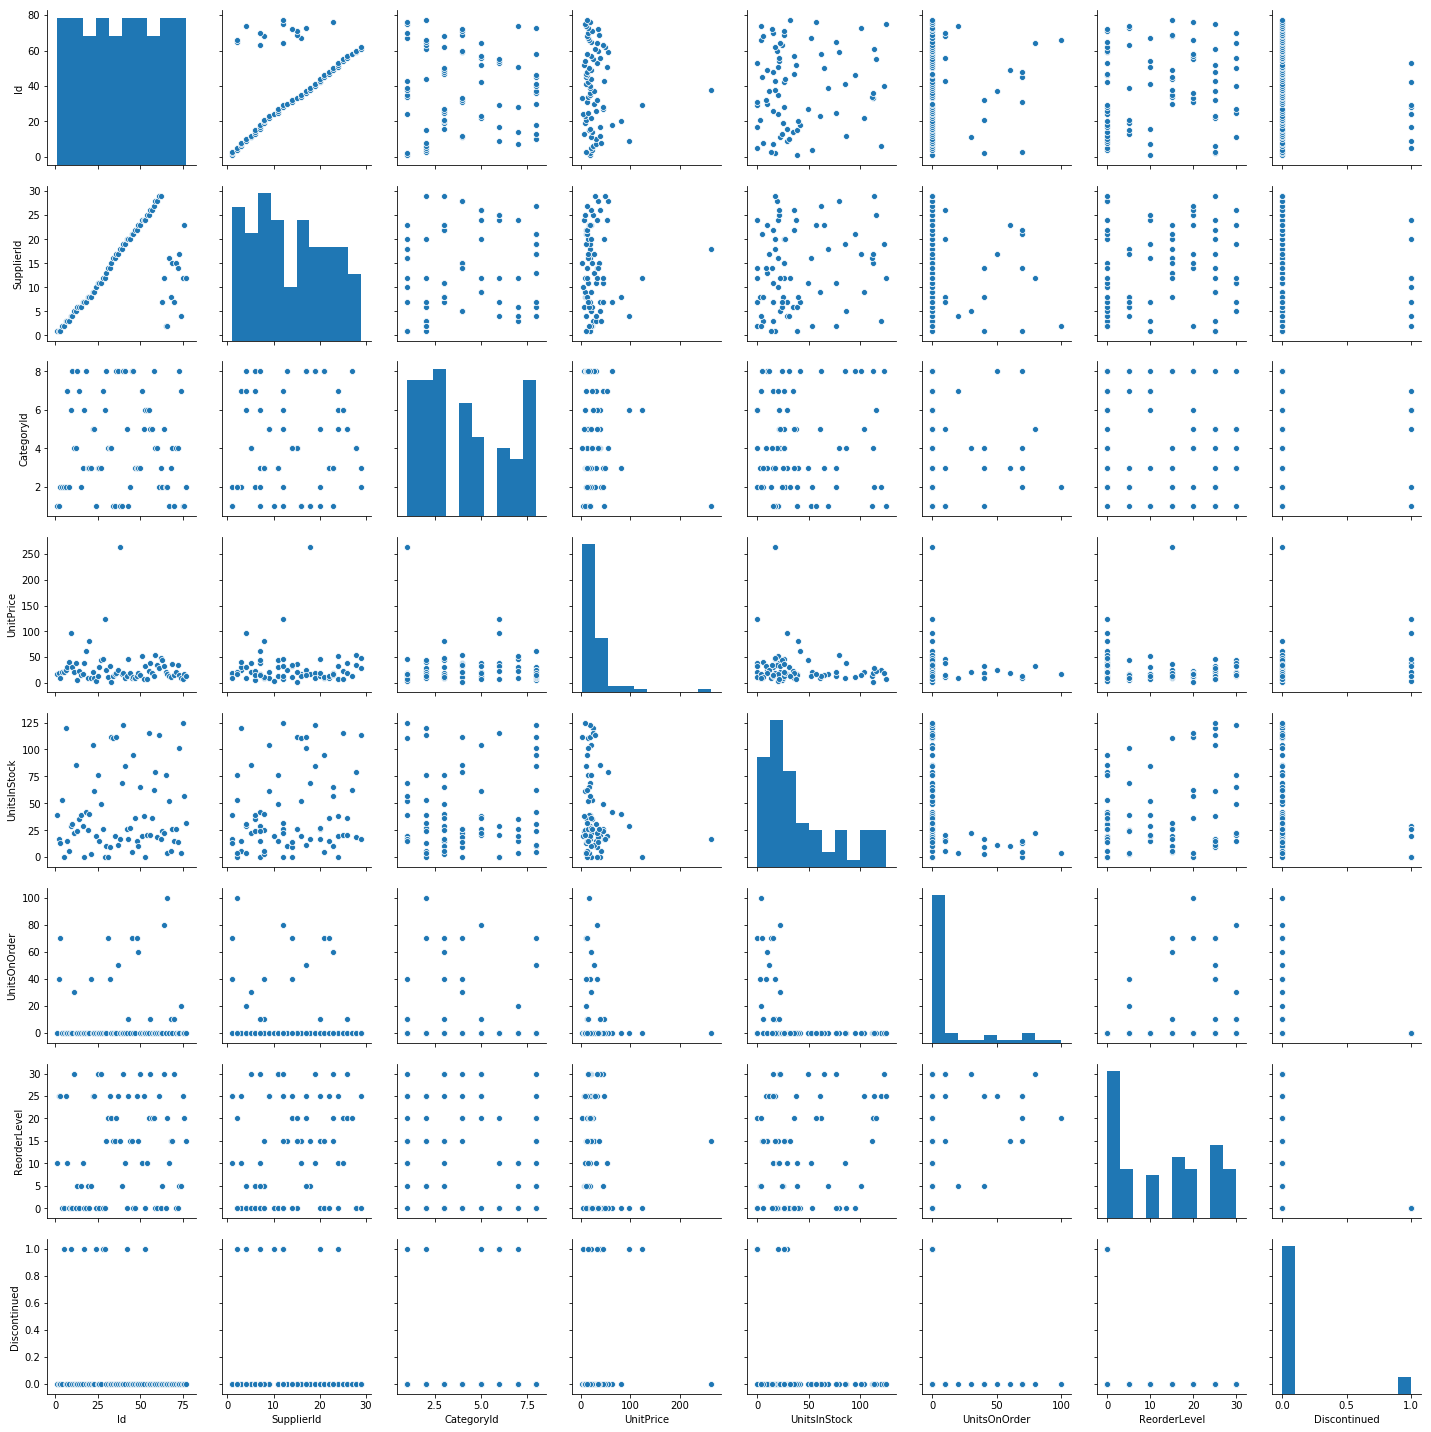

In [31]:
sns.pairplot(product_data);

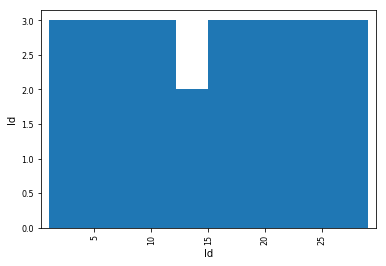

In [32]:
pd.plotting.scatter_matrix(supplier_data); 

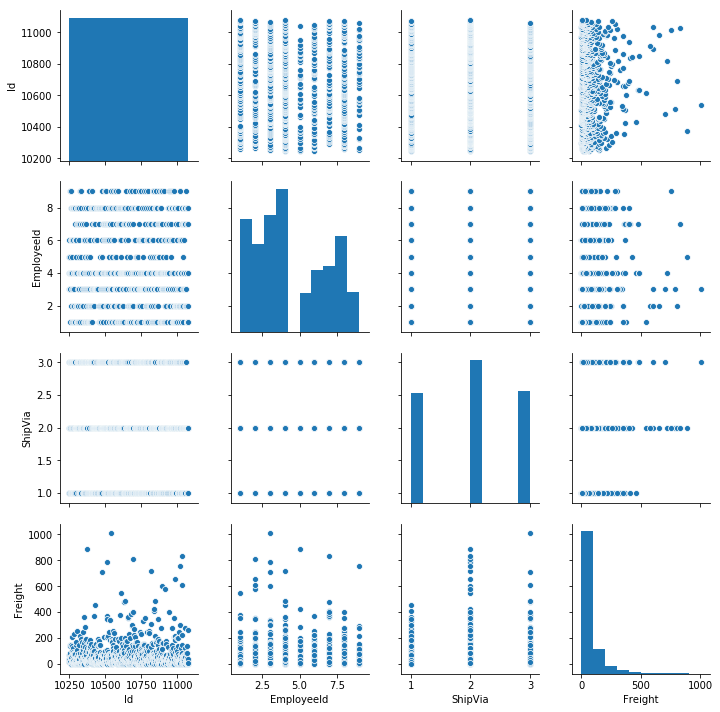

In [33]:
sns.pairplot(order_data);

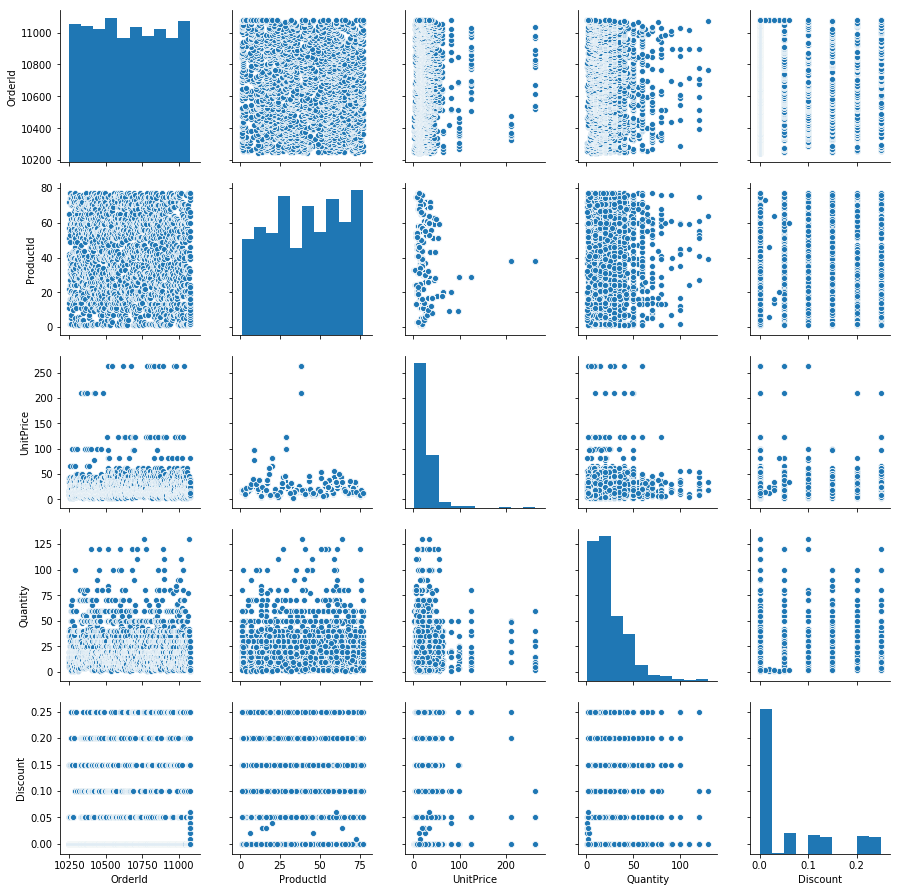

In [34]:
sns.pairplot(order_detail_data);

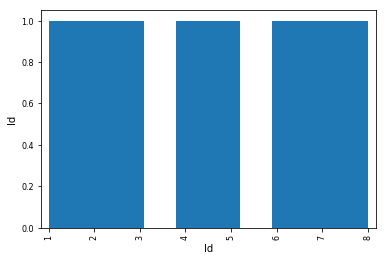

In [35]:
pd.plotting.scatter_matrix(category_data); 

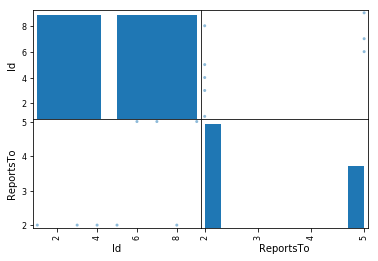

In [36]:
pd.plotting.scatter_matrix(employee_data);

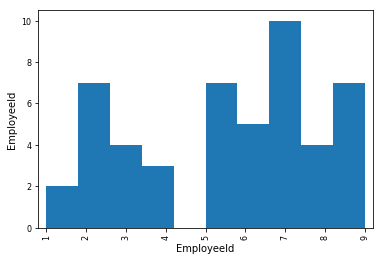

In [37]:
pd.plotting.scatter_matrix(employee_territory_data);

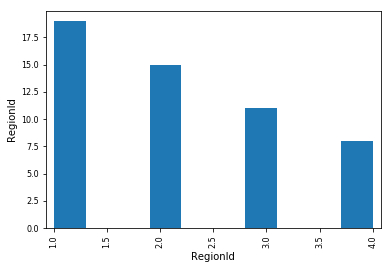

In [38]:
pd.plotting.scatter_matrix(territory_data);

Customer_data cannot be visually displayed due to indexing and formatting of the data within the table. 

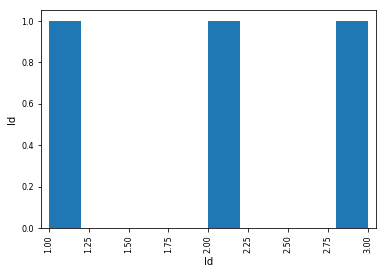

In [39]:
pd.plotting.scatter_matrix(shipper_data);

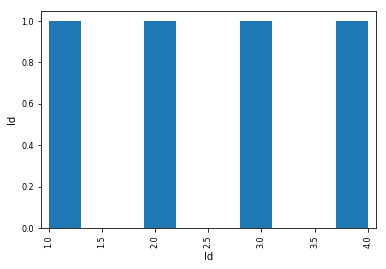

In [40]:
pd.plotting.scatter_matrix(region_data);

Final thoughts:
A lot of the data within this database is categorical in nature.
None of the data displays a normal distribution. Data is either skewed, displays a high degree of curtosis, or a combination of the 2. 

### Revenue by Region

In [41]:
cur.execute("""SELECT * FROM Region""")
region_revenue = pd.DataFrame(cur.fetchall())
region_revenue

,0,1
0,1,Eastern
1,2,Western
2,3,Northern
3,4,Southern


In [42]:
cur.execute("""SELECT * FROM Region
               """)
region_revenue= pd.DataFrame(cur.fetchall())
region_revenue.columns = [x[0] for x in cur.description]
region_revenue.head()

,Id,RegionDescription
0,1,Eastern
1,2,Western
2,3,Northern
3,4,Southern


In [43]:
cur.execute("""SELECT * FROM Territory""")
bleh = pd.DataFrame(cur.fetchall())
bleh.columns = [x[0] for x in cur.description]
bleh.head()

,Id,TerritoryDescription,RegionId
0,01581,Westboro,1
1,01730,Bedford,1
2,01833,Georgetow,1
3,02116,Boston,1
4,02139,Cambridge,1


In [44]:
#Breakdown revenue per region, freight spend per region
cur.execute("""SELECT * FROM Region
               JOIN Territory
               ON Territory.RegionId = Region.Id""")
region_revenue= pd.DataFrame(cur.fetchall())
region_revenue.columns = [x[0] for x in cur.description]
display(len(region_revenue))
region_revenue.head()

53

,Id,RegionDescription,Id,TerritoryDescription,RegionId
0,1,Eastern,01581,Westboro,1
1,1,Eastern,01730,Bedford,1
2,1,Eastern,01833,Georgetow,1
3,1,Eastern,02116,Boston,1
4,1,Eastern,02139,Cambridge,1


## Does discount amount have a statistically significant effect on the quantity of a product in an order? If so, at what level(s) of discount?

#### Retrieving Pertinent Data

In [45]:
display(order_detail_data.head())
display("----Discount ounts----", order_detail_data['Discount'].value_counts())

,Id,OrderId,ProductId,UnitPrice,Quantity,Discount
0,10248/11,10248,11,14.0,12,0.0
1,10248/42,10248,42,9.8,10,0.0
2,10248/72,10248,72,34.8,5,0.0
3,10249/14,10249,14,18.6,9,0.0
4,10249/51,10249,51,42.4,40,0.0


'----Discount ounts----'

0.00    1317
0.05     185
0.10     173
0.20     161
0.15     157
0.25     154
0.03       3
0.02       2
0.01       1
0.04       1
0.06       1
Name: Discount, dtype: int64

In [46]:
#parsing out data by discount level
#I combined discount levels 1 to 6 due to the small sample sizes
discount_yes = order_detail_data.loc[order_detail_data['Discount'] != 0.00]
discount_no = order_detail_data.loc[order_detail_data['Discount'] == 0.00]
discount_10 = order_detail_data.loc[order_detail_data['Discount'] == 0.10]
discount_15 = order_detail_data.loc[order_detail_data['Discount'] == 0.15]
discount_20 = order_detail_data.loc[order_detail_data['Discount'] == 0.20]
discount_25 = order_detail_data.loc[order_detail_data['Discount'] == 0.25]

In [47]:
cur.execute("""SELECT * FROM OrderDetail 
            WHERE Discount > 0.00 AND Discount <= 0.06""")
discount_1_to_6 = pd.DataFrame(cur.fetchall())
discount_1_to_6.columns = [x[0] for x in cur.description]
display(len(discount_1_to_6))
discount_1_to_6.head()

193

,Id,OrderId,ProductId,UnitPrice,Quantity,Discount
0,10251/22,10251,22,16.8,6,0.05
1,10251/57,10251,57,15.6,15,0.05
2,10252/20,10252,20,64.8,40,0.05
3,10252/33,10252,33,2.0,25,0.05
4,10266/12,10266,12,30.4,12,0.05


In [48]:
dis_libraries = {'discount_yes': discount_yes, 'discount_no': discount_no, 'discount_1_to_6': discount_1_to_6, 
                 'discount_10': discount_10, 'discount_15': discount_15, 'discount_20': discount_20, 
                 'discount_25': discount_25}
for key, value in dis_libraries.items():
    print('There are {} values in {}'.format(len(value), key))

There are 838 values in discount_yes
There are 1317 values in discount_no
There are 193 values in discount_1_to_6
There are 173 values in discount_10
There are 157 values in discount_15
There are 161 values in discount_20
There are 154 values in discount_25


In [49]:
a = discount_no['Quantity'].tolist()
b = discount_yes['Quantity'].tolist()
diff_mu_a_b = np.mean(a) - np.mean(b)
all_data =  a + b

In [50]:
diff_mu_a_b

-5.394523243866239

In [51]:
df = pd.DataFrame({'all_data':all_data})
sample_a = df.sample(replace = False, n = len(a))
sample_b = df.drop(sample_a.index, axis = 0)
display(sample_a.shape, sample_b.shape)

(1317, 1)

(838, 1)

In [52]:
sample_mean_diff = sample_a['all_data'].mean() - sample_b['all_data'].mean()
sample_mean_diff

-1.6962631133533748

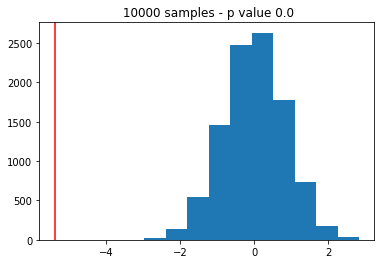

In [53]:
sample_diffs = []
counter = 0
for i in range(10001):
    sample_a = df.sample(replace = False, n = len(a))
    sample_b = df.drop(sample_a.index, axis = 0)
    sample_mean_diff = sample_a['all_data'].mean() - sample_b['all_data'].mean()
    sample_diffs.append(sample_mean_diff)
    if sample_mean_diff < diff_mu_a_b:
        counter += 1
plt.hist(sample_diffs);
plt.axvline(diff_mu_a_b, color = 'red');
plt.title(f' {i} samples - p value {counter/i}');

There is a significant difference between the mean quantity of items ordered when a discount is applied vs when there is not. Further examination must happen to determine the extent of the effect. 

(1317, 1)

(193, 1)

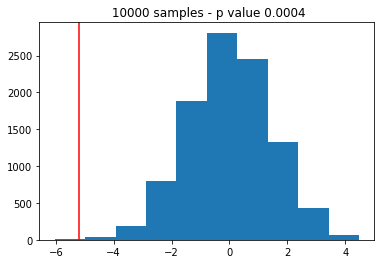

In [54]:
#discount_1_6
a = discount_no['Quantity'].tolist()
b = discount_1_to_6['Quantity'].tolist()
diff_mu_a_b = np.mean(a) - np.mean(b)
all_data =  a + b
diff_mu_a_b
df = pd.DataFrame({'all_data':all_data})
sample_a = df.sample(replace = False, n = len(a))
sample_b = df.drop(sample_a.index, axis = 0)
display(sample_a.shape, sample_b.shape)
sample_mean_diff = sample_a['all_data'].mean() - sample_b['all_data'].mean()
sample_mean_diff
sample_diffs = []
counter = 0
for i in range(10001):
    sample_a = df.sample(replace = False, n = len(a))
    sample_b = df.drop(sample_a.index, axis = 0)
    sample_mean_diff = sample_a['all_data'].mean() - sample_b['all_data'].mean()
    sample_diffs.append(sample_mean_diff)
    if sample_mean_diff < diff_mu_a_b:
        counter += 1
plt.hist(sample_diffs);
plt.axvline(diff_mu_a_b, color = 'red');
plt.title(f' {i} samples - p value {counter/i}');

(1317, 1)

(173, 1)

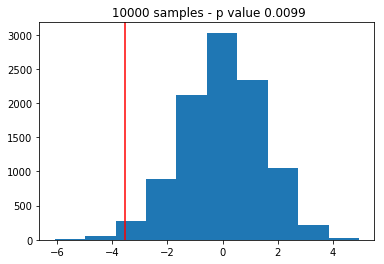

In [55]:
#discount_10
a = discount_no['Quantity'].tolist()
b = discount_10['Quantity'].tolist()
diff_mu_a_b = np.mean(a) - np.mean(b)
all_data =  a + b
diff_mu_a_b
df = pd.DataFrame({'all_data':all_data})
sample_a = df.sample(replace = False, n = len(a))
sample_b = df.drop(sample_a.index, axis = 0)
display(sample_a.shape, sample_b.shape)
sample_mean_diff = sample_a['all_data'].mean() - sample_b['all_data'].mean()
sample_mean_diff
sample_diffs = []
counter = 0
for i in range(10001):
    sample_a = df.sample(replace = False, n = len(a))
    sample_b = df.drop(sample_a.index, axis = 0)
    sample_mean_diff = sample_a['all_data'].mean() - sample_b['all_data'].mean()
    sample_diffs.append(sample_mean_diff)
    if sample_mean_diff < diff_mu_a_b:
        counter += 1
plt.hist(sample_diffs);
plt.axvline(diff_mu_a_b, color = 'red');
plt.title(f' {i} samples - p value {counter/i}');

(1317, 1)

(157, 1)

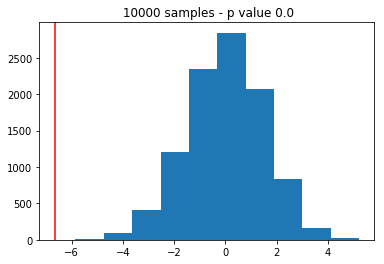

In [56]:
#discount_15
a = discount_no['Quantity'].tolist()
b = discount_15['Quantity'].tolist()
diff_mu_a_b = np.mean(a) - np.mean(b)
all_data =  a + b
diff_mu_a_b
df = pd.DataFrame({'all_data':all_data})
sample_a = df.sample(replace = False, n = len(a))
sample_b = df.drop(sample_a.index, axis = 0)
display(sample_a.shape, sample_b.shape)
sample_mean_diff = sample_a['all_data'].mean() - sample_b['all_data'].mean()
sample_mean_diff
sample_diffs = []
counter = 0
for i in range(10001):
    sample_a = df.sample(replace = False, n = len(a))
    sample_b = df.drop(sample_a.index, axis = 0)
    sample_mean_diff = sample_a['all_data'].mean() - sample_b['all_data'].mean()
    sample_diffs.append(sample_mean_diff)
    if sample_mean_diff < diff_mu_a_b:
        counter += 1
plt.hist(sample_diffs);
plt.axvline(diff_mu_a_b, color = 'red');
plt.title(f' {i} samples - p value {counter/i}');

(1317, 1)

(161, 1)

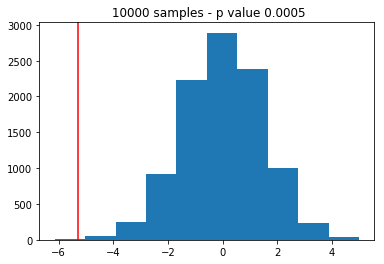

In [57]:
#discount_20
a = discount_no['Quantity'].tolist()
b = discount_20['Quantity'].tolist()
diff_mu_a_b = np.mean(a) - np.mean(b)
all_data =  a + b
diff_mu_a_b
df = pd.DataFrame({'all_data':all_data})
sample_a = df.sample(replace = False, n = len(a))
sample_b = df.drop(sample_a.index, axis = 0)
display(sample_a.shape, sample_b.shape)
sample_mean_diff = sample_a['all_data'].mean() - sample_b['all_data'].mean()
sample_mean_diff
sample_diffs = []
counter = 0
for i in range(10001):
    sample_a = df.sample(replace = False, n = len(a))
    sample_b = df.drop(sample_a.index, axis = 0)
    sample_mean_diff = sample_a['all_data'].mean() - sample_b['all_data'].mean()
    sample_diffs.append(sample_mean_diff)
    if sample_mean_diff < diff_mu_a_b:
        counter += 1
plt.hist(sample_diffs);
plt.axvline(diff_mu_a_b, color = 'red');
plt.title(f' {i} samples - p value {counter/i}');

(1317, 1)

(154, 1)

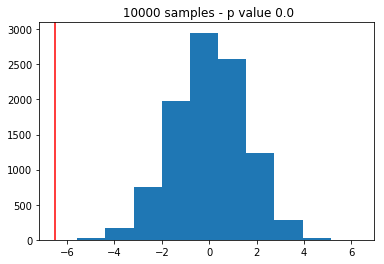

In [58]:
#disocunt_25
a = discount_no['Quantity'].tolist()
b = discount_25['Quantity'].tolist()
diff_mu_a_b = np.mean(a) - np.mean(b)
all_data =  a + b
diff_mu_a_b
df = pd.DataFrame({'all_data':all_data})
sample_a = df.sample(replace = False, n = len(a))
sample_b = df.drop(sample_a.index, axis = 0)
display(sample_a.shape, sample_b.shape)
sample_mean_diff = sample_a['all_data'].mean() - sample_b['all_data'].mean()
sample_mean_diff
sample_diffs = []
counter = 0
for i in range(10001):
    sample_a = df.sample(replace = False, n = len(a))
    sample_b = df.drop(sample_a.index, axis = 0)
    sample_mean_diff = sample_a['all_data'].mean() - sample_b['all_data'].mean()
    sample_diffs.append(sample_mean_diff)
    if sample_mean_diff < diff_mu_a_b:
        counter += 1
plt.hist(sample_diffs);
plt.axvline(diff_mu_a_b, color = 'red');
plt.title(f' {i} samples - p value {counter/i}');

Every level of discount has a significantly higher than average quantity of items ordered.

## Question 2

In [59]:
#REVISIT
#Do discounted items have higher order frequencies over time?

## Question 3

In [60]:
#Do countires outside of the US have higher freight costs? 
order_data.head()

,Id,CustomerId,EmployeeId,OrderDate,RequiredDate,ShippedDate,ShipVia,Freight,ShipName,ShipAddress,ShipCity,ShipRegion,ShipPostalCode,ShipCountry
0,10248,VINET,5,2012-07-04,2012-08-01,2012-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,Western Europe,51100,France
1,10249,TOMSP,6,2012-07-05,2012-08-16,2012-07-10,1,11.61,Toms Spezialitäten,Luisenstr. 48,Münster,Western Europe,44087,Germany
2,10250,HANAR,4,2012-07-08,2012-08-05,2012-07-12,2,65.83,Hanari Carnes,"Rua do Paço, 67",Rio de Janeiro,South America,05454-876,Brazil
3,10251,VICTE,3,2012-07-08,2012-08-05,2012-07-15,1,41.34,Victuailles en stock,"2, rue du Commerce",Lyon,Western Europe,69004,France
4,10252,SUPRD,4,2012-07-09,2012-08-06,2012-07-11,2,51.30,Suprêmes délices,"Boulevard Tirou, 255",Charleroi,Western Europe,B-6000,Belgium


In [61]:
order_data.Freight.describe()

count     830.000000
mean       78.244205
std       116.779294
min         0.020000
25%        13.380000
50%        41.360000
75%        91.430000
max      1007.640000
Name: Freight, dtype: float64

In [62]:
W_Europe = order_data.loc[order_data['ShipRegion'] == 'Western Europe']
E_Europe = order_data.loc[order_data['ShipRegion'] == 'Eastern Europe']
S_Europe = order_data.loc[order_data['ShipRegion'] == 'Southern Europe']
N_Europe = order_data.loc[order_data['ShipRegion'] == 'Northern Europe']
British_Isles = order_data.loc[order_data['ShipRegion'] == 'British Isles']
N_America = order_data.loc[order_data['ShipRegion'] == 'North America']
S_America = order_data.loc[order_data['ShipRegion'] == 'South America']
C_America = order_data.loc[order_data['ShipRegion'] == 'Central America']
Scandinavia = order_data.loc[order_data['ShipRegion'] == 'Scandinavia']

In [63]:
N_America_freight_mean = N_America.Freight.mean()
N_America_freight_mean

105.06171052631578

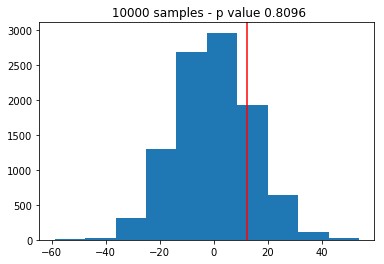

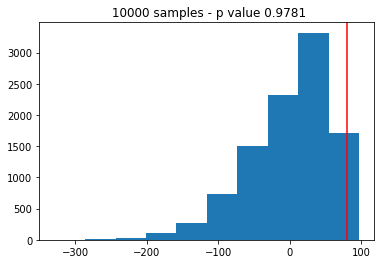

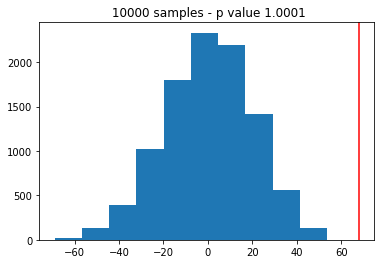

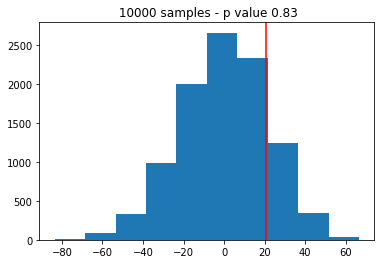

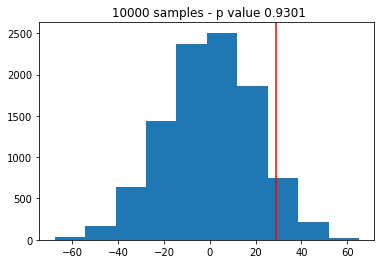

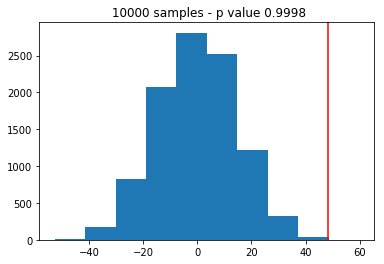

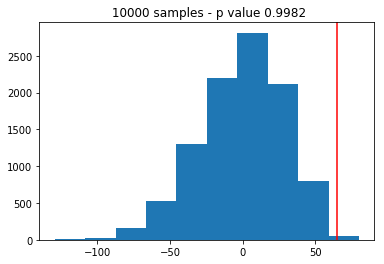

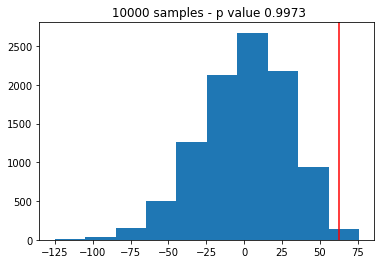

In [64]:
comparison = [W_Europe, E_Europe, S_Europe, N_Europe, British_Isles, S_America, C_America, Scandinavia]
for i in comparison:
    counter = 0 
    sample_diffs = [] 
    a = N_America['Freight'].tolist()
    b = i['Freight'].tolist()
    diff_mu_a_b = np.mean(a) - np.mean(b)  
    all_data =  a + b 
    df = pd.DataFrame({'all_data':all_data})
    sample_a = df.sample(replace = False, n = len(a))
    sample_b = df.drop(sample_a.index, axis = 0)
    sample_mean_diff = sample_a['all_data'].mean() - sample_b['all_data'].mean()
    for x in range(10001):
        diff_mu_a_b = np.mean(a) - np.mean(b)
        sample_a = df.sample(replace = False, n = len(a))
        sample_b = df.drop(sample_a.index, axis = 0)
        sample_mean_diff = sample_a['all_data'].mean() - sample_b['all_data'].mean()
        sample_diffs.append(sample_mean_diff)
        if sample_mean_diff < diff_mu_a_b:
            counter += 1
    plt.hist(sample_diffs);
    plt.axvline(diff_mu_a_b, color = 'red');
    plt.title(f' {x} samples - p value {counter/x}');
    plt.show()

In [65]:
E_

NameError: name 'E_' is not defined

## Question 4

In [ ]:
#Do suppliers in Asia have a higher instance of discontinued products?